In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
df = pd.read_csv('C:/Users/saini/OneDrive/Documents/SML/assignment4/data.csv')
df = df.dropna()

In [9]:
dataset = df.to_numpy()
n = dataset.shape[0]
# for m =1
X = dataset[:,0].reshape((n,1))
Y = dataset[:,1].reshape((n,1))

In [10]:
# a) Perform Linear regression and compute the RMSE
# linear regression
def linearRegression(X, Y):
    w1 = X.dot(X.T)
    inv = np.linalg.inv(w1)
    w2 = X.dot(Y)
    w = inv.dot(w2)
    return w

In [11]:
def calcRMSE(x, w, Y):
    mse = 0
    n = x.shape[1]
    d = x.shape[0]
    for i in range(n):
        xi = x[:,i].reshape((d,1))
        pred = (w.T).dot(xi)
        yi = Y[i][0]
        mse += ( yi - pred )**2

    rmse = math.sqrt(mse/n)
    return rmse


In [12]:
def  ploynominal(m, X):
    n = X.shape[0]
    row = np.zeros((n,1))
    ones = np.ones((n,1))
    final = np.array(X)
    final = np.append(final, ones , axis =1)
    p = 2
    for k in range(1,m):
        row = np.zeros((n,1))
        for i in range(len(final)):
            row[i][0] = X[i][0]**(p)
        p += 1
        final = np.append( row , final, axis =1 )
    return final.T

In [13]:
def plot( w, label):
    ypred = (w.T).dot(x)
    plt.scatter( X , Y )
    plt.plot(X, ypred.T,'ko', label = label)
    plt.legend()
    plt.show()

In [14]:
# Que2 a part
# Que 1 b part
# Perform Linear regression for all features and compute the RMSE

x = ploynominal( 1 , X)
w = linearRegression(x, Y)
rmse = calcRMSE(x, w, Y)
print( "rmse of the dataset is " , rmse )

rmse of the dataset is  0.8187007841274979


In [15]:
# Que 1 c part Perform k-fold cross-validation for k=5 on the training dataset.
# k-fold validation
def kFold(X, Y, k):
    n = X.shape[0]
    length = int(n/k)
    prev_index = 0
    new_index = length
    xiArray = []
    yiArray = []
    
    testX = []
    testY = []
    for i in range(k):
        subPart = X[prev_index:new_index, :]
        label = Y[prev_index:new_index]

        yiArray.append(label)
        xiArray.append(subPart)
        prev_index = new_index
        new_index += length
    
    xList = []
    yList = []
    flag =0

    for j in range(k):
        features = []
        labels = []
        for i in range(k):
            features.append(xiArray[i])
            labels.append(yiArray[i])
            
        testF = features[flag]
        testL = labels[flag]
        testX.append(testF)
        testY.append(testL)
        
        del features[flag]
        del labels[flag]
        
        finalX = np.array(features[0])
        finalY = np.array(labels[0])

        for m in range(1, k-1):
            finalX = np.concatenate((features[m], finalX))
            finalY = np.concatenate((labels[m], finalY))
            xList.append(finalX)
            yList.append(finalY)
        flag += 1
    
    return (xList, yList, testX, testY)

In [17]:
# Perform k-fold cross-validation for k=5 on the training dataset.
# d) part
# validation_error
xList, yList, testX, testY = kFold(X,Y,5)
avg =0
for j in range(5):
    x = ploynominal(1, xList[j])
    w = linearRegression(x, yList[j])
    x = ploynominal(1, testX[j])
    cross_valid = calcRMSE(x, w, testY[j])
    avg += cross_valid
    
print("validation error on training dataset",avg/5)
       
avg =0
xList, yList, testX, testY = kFold(X,Y,5)
for j in range(5):
    x = ploynominal(1, xList[j])
    w = linearRegression( x, yList[j])
    x = ploynominal(1, xList[j])
    training_error = calcRMSE( x, w, yList[j])
    avg += training_error
print("training error on training dataset",avg/5)


validation error on training dataset 0.813324269976927
training error on training dataset 0.8432136973556215


In [30]:
# e part
# e part) Perform step (d) for different degrees of polynomials using Polynomial
# Regression (Ex. For degree=1 perform 5-fold cross-validation, For degree=2,
# perform 5-fold cross-validation and so on.)
# validation_error
xList, yList, testX, testY = kFold(X,Y,5)
validError = []
minAvg = 100000
# degree = [1,2,4,5,10,15]
for m in range(1, 20):
    avg =0
    for j in range(5):
        x = ploynominal(m, xList[j])
        w = linearRegression(x, yList[j])
        x = ploynominal(m, testX[j])
        cross_valid = calcRMSE(x, w, testY[j])
        avg += cross_valid
    if( minAvg > avg/5 ):
        minAvg = avg/5
        bestm = m
    validError.append(avg/5)
print("Validation error for different degrees", validError)
print("best m that fits the dataset best is m :", bestm)


Validation error for different degrees [0.813324269976927, 0.8150172084098077, 0.7932433562206112, 0.7941378747220915, 0.599951343321087, 0.6261684047841791, 0.41027115330258085, 0.4114667617206849, 0.4104512059359845, 0.4139268204573791, 0.41513714902234095, 0.4256034215631491, 0.4602843314701898, 0.4718610733409327, 0.6840604462268688, 0.5547603456192162, 0.49399770250921843, 0.440905449781306, 0.630839154517645]
best m that fits the dataset best is m : 7


In [31]:
# training_error
xList, yList, testX, testY = kFold(X,Y,5)
trainError = []
# degree = 
for m in range(1,20):
    avg = 0
    for j in range(5):
        x = ploynominal(m, xList[j])
        w = linearRegression( x, yList[j])

        x = ploynominal(m, xList[j])
        training_error = calcRMSE( x, w, yList[j])
        avg += training_error
    trainError.append(avg/5)
print("Training error for different degrees", trainError)


Training error for different degrees [0.8432136973556215, 0.8393945618645875, 0.8179704538378711, 0.815722473463965, 0.5830631970548897, 0.5711352262852506, 0.3913897671807313, 0.3871170302307577, 0.38270652155974927, 0.3812445323771213, 0.3798991468636978, 0.3792350572161221, 0.3784056081153133, 0.3764393978111772, 0.3718054053140938, 0.370503567421006, 0.3609128942169214, 0.35720083013202475, 0.35613909024548046]


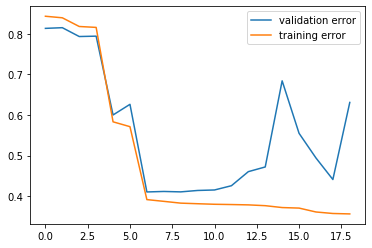

In [32]:
# f part) Use RMSE as an evaluation metric (Note: You can’t use any inbuilt library for
# it). Compute mean RMSE of training and validation set separately from 5-fold
# cross-validation for each degree of the polynomial and plot it.

plt.plot(validError, label= "validation error")
plt.plot(trainError, label= "training error")
plt.legend()
plt.show()